<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-02-tree-based-models-gradient-boosted-lightgbm-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.2 Light Gradient Boosting Machine (LightGBM)

LightGBM (Light Gradient Boosting Machine) is an open-source gradient boosting framework that is designed to be both efficient and scalable. It is based on the gradient boosting framework and uses a tree-based learning algorithm. This tutorial will guide you through the concepts and implementation of LightGBM, including its advantages, how it works, and how to implement it in R with {lightgbm} package.


## Overview

Light Gradient Boosting Machine (LightGBM) is a high-performance, distributed, and efficient gradient boosting framework designed for speed and scalability, particularly for large-scale datasets. Developed by Microsoft, it is optimized for tasks like classification, regression, ranking, and other machine learning problems. LightGBM is part of the gradient boosting family, which builds an ensemble of weak learners (typically decision trees) to create a strong predictive model. LightGBM stands out due to its focus on computational efficiency and memory optimization, making it faster and less resource-intensive than other gradient boosting frameworks like XGBoost, especially for large datasets with high-dimensional features.


### Key Features of LightGBM

- Histogram-based learning for speed and low memory use.
- Leaf-wise tree growth for high accuracy.
- Native categorical feature support.
- Parallel and GPU training.
- Sparse data optimization.
- Custom loss functions.
- Feature importance and early stopping.

### How LightGBM Works

LightGBM (Light Gradient Boosting Machine) operates as a gradient boosting framework that builds an ensemble of decision trees iteratively to minimize a loss function. Below is an explanation of each step in the provided flowchart, including relevant equations where applicable.


1. Data Preprocessing

In the "Data Preprocessing" step, the algorithm loads the dataset, handles categorical features, and discretizes continuous features into histograms to optimize computation. This involves transforming feature values $x_j$ for feature $j$ into discrete bins $h_j(x_j)$), where the number of bins $k$ is predefined, reducing memory usage and speeding up subsequent calculations.

2. Initialize Model

Sets the initial predictions for all instances, typically starting with a constant value that minimizes the loss function. This is expressed as:

$$ \hat{y}_i^{(0)} = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma) $$

where $L$ represents the loss function (e.g., mean squared error for regression or log loss for classification), and $y_i$ is the true target value for instance $i$.

2. Compute Gradients and Hessians

Calculates the first-order (gradient) and second-order (Hessian) derivatives of the loss function with respect to the predictions. These guide the tree-building process.

Gradient:

$$ g_i^{(t)} = \frac{\partial L(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)}} $$
Hessain:

$$  h_i^{(t)} = \frac{\partial^2 L(y_i, \hat{y}_i^{(t-1)})}{\partial (\hat{y}_i^{(t-1)})^2} $$

These are computed for each instance $i$ at iteration $t$.

3. Apply GOSS (Gradient-based One-Side Sampling)

This step reduces the dataset size by sampling instances based on their gradient magnitudes, prioritizing those with larger gradients to focus on hard examples. The sampling probability is proportional to $p_i \propto |g_i|$, allowing the algorithm to use a subset of instances for constructing the next tree, thus improving efficiency.

::: callout-note
Gradient-based One-Side Sampling" (GOSS):

Gradient-based One-Side Sampling (GOSS) is a data subsampling method used in LightGBM. GOSS is designed to speed up the training process of gradient boosting algorithms while maintaining or improving the model's accuracy.GOSS works by first sorting the training instances according to their gradients. The instances with larger gradients are considered more important for the model, as they provide more information about the loss function
:::


4. Apply EFB (Exclusive Feature Bundling)

During the "Apply EFB (Exclusive Feature Bundling)" step, the algorithm groups mutually exclusive features into bundles to reduce dimensionality while minimizing information loss, which is particularly useful for sparse datasets. This involves combining features with no overlapping non-zero values into a single histogram, optimizing the feature space without significant loss of predictive power.

5. Build Decision Tree (Histogram-based, Leaf-wise growth)

The "Build Decision Tree (Histogram-based, Leaf-wise growth)" step constructs a decision tree using histogram-based splitting and selects the leaf with the maximum loss reduction for splitting, known as leaf-wise growth.

The optimal output for a leaf $q$ is  defined as:

$$\gamma_q = -\frac{G_q}{H_q + \lambda}$$
where $G_q = \sum_{i \in q} g_i$ is the sum of gradients, $H_q = \sum_{i \in q} h_i$ is the sum of Hessians, and $\lambda$ is a regularization parameter. The gain (loss reduction) from a split is calculated as:

$$ \text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{G_q^2}{H_q + \lambda} \right] - \gamma $$

where $L$ and $R$ denote the left and right child nodes.

6. Update Model Predictions

The algorithm incorporates the new tree's contribution into the existing predictions, refining the model iteratively. This is done using the following equation:

$$ \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta \cdot \text{tree}_t(x_i) $$
where $\eta$ is the learning rate and $\text{tree}_t(x_i)$ is the prediction from the new tree for instance $i$ at iteration $t$.

::: callout-note
Leaf-wise Growth:

"Leaf-wise" growth strategy is a tree building algorithm used in gradient boosting algorithms such as LightGBM. In this strategy, the tree is grown leaf-wise, meaning that it starts by growing the tree with a single root node, and then at each step, it selects the leaf node that yields the largest reduction in the loss function, and splits it into two child nodes
:::

7. Check Stopping Criteria

This step evaluates whether to continue training by checking if the maximum number of trees is reached or if convergence is achieved. This is determined by conditions such as $t \geq \text{max_trees}$ or $\Delta L < \epsilon$, where $\Delta L$ is the change in loss and $\epsilon$ is a small threshold, halting the process when no significant improvement is observed.

8. Output Final Model

Finally, the "Output Final Model" step combines all the trained trees to produce the final predictive model, which is the sum of contributions from each tree. The final prediction for an instance $i$ is given by:

$$ \hat{y}_i = \sum_{t=1}^T \eta \cdot \text{tree}_t(x_i)  $$

where $T$ is the total number of trees, providing the complete model for inference.

Here below is a flowchart illustrating the lightGBM workflow:


![alt text](http://drive.google.com/uc?export=view&id=197dEVzOVTfItn4SMIM-1i-bQc-QVRPNb)








### Advantages of LightGBM

It is designed to be distributed and efficient with the following advantages:

-   Faster training speed and higher efficiency.

-   Lower memory usage.

-   Better accuracy.

-   Support of parallel, distributed, and GPU learning.

-   Capable of handling large-scale data.

### Limitations of LightGBM

- Leaf-wise tree growth can lead to overfitting, especially with small datasets or insufficient regularization, as it aggressively splits nodes with the highest loss reduction.
- Histogram-based learning may reduce precision for datasets with highly skewed or sparse features, potentially losing fine-grained information.
- Requires careful tuning of hyperparameters (e.g., learning rate, max depth, and number of leaves) to achieve optimal performance, which can be time-consuming.
- May struggle with extremely noisy data or datasets with a very high number of categorical features, where feature bundling might oversimplify relationships.
- Parallel and GPU support, while advantageous, can be resource-intensive and may not always scale well on very small datasets or underconstrained hardware.

### Key Hyperparameters of LightGBM

The key hyperparameters of LightGBM that significantly influence its performance include:

- `learning_rate`: Controls the step size for each iteration, typically set between 0.01 and 0.1, where a smaller value (e.g., \( \eta \)) slows learning but may improve generalization.
- `num_leaves`: Determines the maximum number of leaves in one tree, with higher values (e.g., 31 or 127) increasing model complexity and risk of overfitting.
- `max_depth`: Limits the maximum depth of each tree, preventing overfitting by capping growth (e.g., 5-10 is common).
- `min_data_in_leaf`: Sets the minimum number of data points in a leaf, helping to avoid overfitting (e.g., 20-100 depending on dataset size).
- `feature_fraction`: Specifies the fraction of features to consider per tree (e.g., 0.8), introducing randomness to reduce overfitting.
- `bagging_fraction`: Defines the fraction of data to sample for each iteration (e.g., 0.9), aiding in reducing variance.
- `lambda_l1` and `lambda_l2`: Regularization parameters (L1 and L2) to penalize large weights, controlling model complexity (e.g., 0 to 1).
- `min_gain_to_split`: Sets the minimum gain required to split a leaf, preventing unnecessary splits (e.g., 0.01).
- `num_iterations`: Defines the total number of boosting iterations or trees to build (e.g., 100-1000), affecting training time and accuracy.

### Comparison of GBM and LightGBM


| **Aspect**              | **GBM (Gradient Boosting Machine)**         | **LightGBM**                              |
|--------------------------|---------------------------------------------|-------------------------------------------|
| `Speed and Efficiency` | Slower, less memory-efficient due to level-wise growth | Faster and memory-efficient with histogram-based learning |
| `Tree Growth Strategy` | Level-wise, grows trees layer by layer      | Leaf-wise, splits leaf with max loss reduction |
| `Scalability`          | Struggles with large datasets, sequential   | Optimized for large datasets, supports parallel/GPU training |
| `Feature Handling`     | Requires preprocessed categorical features  | Natively supports categorical features    |
| `Sampling Techniques`  | Lacks advanced sampling methods             | Uses GOSS and EFB for data/feature reduction |
| `Overfitting Control`  | More robust due to level-wise approach      | Requires tuning (e.g., min_data_in_leaf) to prevent overfitting |


## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314977 sha256=894a4a18e7a3486702dfd68e915055d3193fc772c528e755644d2e7f047255a0
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Light GBM Implementation from Scratch in R

Implementing LightGBM from scratch in R for classification and regression without using any external packages involves creating a simplified version of its core concepts, such as gradient boosting with histogram-based learning and leaf-wise tree growth. Below is a basic implementation focusing on the key steps: initializing a model, computing gradients and Hessians, building decision trees iteratively, and updating predictions. This example uses a simple dataset and avoids advanced features like GOSS or EFB for simplicity.

### Generate Synthetic Data






In [ ]:
%%R
# Generate synthetic data
set.seed(123)
n <- 100

# Regression data
X_reg <- matrix(runif(n * 2), ncol = 2)  # 2 features
y_reg <- 2 * X_reg[, 1] + 3 * X_reg[, 2] + rnorm(n)  # Linear target with noise

# Classification data (binary)
X_class <- matrix(runif(n * 2), ncol = 2)
y_class <- ifelse(2 * X_class[, 1] + 3 * X_class[, 2] + rnorm(n) > 0, 1, 0)  # Binary target

### LightGBM Implementation

- Parameters: `n_trees` = 10, `learning_rate` = 0.1, `max_depth` = 3, `min_data_in_leaf` = 5.

- `build_tree` recursively builds a tree, returns $\text{mean(grad)} / (\text{mean(hess)} + 1e-10$ if `depth` = 0 or `grad` ≤ `min_data`.

- Splits on first feature's median threshold, checks `min_data` in splits, recursively builds left/right subtrees, returns list with values, threshold, and feature.

- `update_prediction` returns `tree * learning_rate` for numeric leaves, else compares $ x[\text{tree$feature}] $ with `tree$threshold`, recursively calls `tree$left` or `tree$right`.


In [ ]:
%%R
# Parameters
n_trees <- 10
learning_rate <- 0.1
max_depth <- 3
min_data_in_leaf <- 5

# Function to build a simple decision tree
build_tree <- function(X, grad, hess, depth, min_data) {
  if (depth == 0 || length(grad) <= min_data) {
    return(mean(grad) / (mean(hess) + 1e-10))  # Leaf value
  }

  feature_idx <- 1
  threshold <- median(X[, feature_idx])
  left_idx <- which(X[, feature_idx] <= threshold)
  right_idx <- which(X[, feature_idx] > threshold)

  if (length(left_idx) < min_data || length(right_idx) < min_data) {
    return(mean(grad) / (mean(hess) + 1e-10))
  }

  left_value <- build_tree(X[left_idx, ], grad[left_idx], hess[left_idx], depth - 1, min_data)
  right_value <- build_tree(X[right_idx, ], grad[right_idx], hess[right_idx], depth - 1, min_data)

  return(list(left = left_value, right = right_value, threshold = threshold, feature = feature_idx))
}

# Function to update predictions
update_prediction <- function(x, tree) {
  if (is.numeric(tree)) return(tree * learning_rate)
  if (x[tree$feature] <= tree$threshold) {
    return(update_prediction(x, tree$left))
  } else {
    return(update_prediction(x, tree$right))
  }
}

#### Regression and Classification Implementation

In [ ]:
%%R
# Regression Implementation
predictions_reg <- rep(mean(y_reg), n)
for (t in 1:n_trees) {
  gradients <- y_reg - predictions_reg  # Gradient for squared error
  hessians <- rep(1, n)                # Hessian for squared error
  tree <- build_tree(X_reg, gradients, hessians, max_depth, min_data_in_leaf)
  for (i in 1:n) {
    predictions_reg[i] <- predictions_reg[i] + update_prediction(X_reg[i, ], tree)
  }
}

# Classification Implementation
predictions_class <- rep(0, n)  # Initial log-odds (can start at 0)
for (t in 1:n_trees) {
  # Logistic loss gradient and Hessian
  p <- 1 / (1 + exp(-predictions_class))  # Sigmoid
  gradients <- p - y_class               # Gradient for log loss
  hessians <- p * (1 - p)                # Hessian for log loss
  tree <- build_tree(X_class, gradients, hessians, max_depth, min_data_in_leaf)
  for (i in 1:n) {
    predictions_class[i] <- predictions_class[i] + update_prediction(X_class[i, ], tree)
  }
}

# Output results
cat("Regression Predictions:\n")
print(head(predictions_reg))
cat("\nClassification Predictions (Log-Odds):\n")
print(head(predictions_class))
cat("\nClassification Probabilities:\n")
print(head(1 / (1 + exp(-predictions_class))))  # Convert to probabilities

Regression Predictions:
[1] 2.433534 2.892064 2.141685 2.892064 3.074677 2.022697

Classification Predictions (Log-Odds):
[1] -701.964098   -8.477481 -701.964098 -701.964098   -8.477481   -8.477481

Classification Probabilities:
[1] 1.383138e-305  2.080590e-04 1.383138e-305 1.383138e-305  2.080590e-04
[6]  2.080590e-04


####  Prediction Evaluation



In [ ]:
%%R
# Regression Metrics
mse <- mean((y_reg - predictions_reg)^2)
rmse <- sqrt(mse)
mae <- mean(abs(y_reg - predictions_reg))

# Classification Metrics
pred_prob <- 1 / (1 + exp(-predictions_class))  # Convert log-odds to probabilities
predicted_class <- ifelse(pred_prob >= 0.5, 1, 0)  # Threshold at 0.5
accuracy <- mean(predicted_class == y_class)

# Log Loss
epsilon <- 1e-15  # Avoid log(0)
log_loss <- -mean(y_class * log(pred_prob + epsilon) + (1 - y_class) * log(1 - pred_prob + epsilon))

# Print Results
cat("Regression Evaluation:\n")
cat(sprintf("MSE: %.4f\n", mse))
cat(sprintf("RMSE: %.4f\n", rmse))
cat(sprintf("MAE: %.4f\n", mae))
cat("\nClassification Evaluation:\n")
cat(sprintf("Accuracy: %.4f\n", accuracy))
cat(sprintf("Log Loss: %.4f\n", log_loss))

Regression Evaluation:
MSE: 1.5037
RMSE: 1.2262
MAE: 0.9923

Classification Evaluation:
Accuracy: 0.0500
Log Loss: 23.8582


## Light Gradient Boosting Machine (lightGBM) in R

The {lightGBM} package in R is an interface to the Light Gradient Boosting Machine, a high-performance, scalable gradient boosting framework developed by Microsoft. Optimized for speed and memory efficiency, it supports regression, classification, ranking, and other machine learning tasks. Key features include histogram-based learning, Gradient-based One-Side Sampling (GOSS), Exclusive Feature Bundling (EFB), and leaf-wise tree growth, enabling faster training on large datasets compared to other boosting frameworks like XGBoost. The package provides functions to train models, make predictions, and tune hyperparameters, with native support for categorical features and parallel processing. It is widely used for its efficiency in handling high-dimensional data and large-scale applications.


![alt text](http://drive.google.com/uc?export=view&id=1WxnlV7-utypgLOrMKfiJHXhpftvzalYF
)

The LightGBM R package provides an implementation of the LightGBM algorithm, a highly efficient gradient boosting framework. Here are some key features of the LightGBM R package:

1.  `High performance`: LightGBM is designed to be highly efficient and scalable, making it well-suited for large datasets and high-dimensional feature spaces. The R package provides an interface to the underlying C++ library, which allows it to take advantage of multi-threading and other optimization techniques.

2.  `Cross-validation`: The LightGBM R package provides tools for cross-validation, which can be used to tune hyperparameters and assess model performance.

3.  `Feature importance`: LightGBM computes the feature importance by measuring the number of times each feature is split on in the tree building process. The more a feature is used for splitting, the more important it is considered to be. The R package provides functions for visualizing the feature importance and selecting the most important features.

4.  `Regularization`: LightGBM provides several regularization techniques, such as L1 and L2 regularization, to prevent overfitting. The R package provides options for controlling the amount of regularization.

5.  `Missing value handling`: LightGBM can handle missing values in the data, using a default direction at each node to handle missing values.

6.  `Flexibility`: LightGBM can be used for a wide range of machine learning tasks, including regression, classification, and ranking. It can also handle both numerical and categorical features, and supports custom objective functions.

7.  `GPU acceleration`: The LightGBM R package supports GPU acceleration, which can significantly speed up training and inference on compatible hardware.

### Check amd Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [3]:
%%R
packages <- c('tidyverse',
              'plyr',
              'lightgbm',
              'Metrics',
              'fastDummies',
              'ggpmisc',
              'Metrics')

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2



  tidyverse        plyr    lightgbm     Metrics fastDummies     ggpmisc 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
    Metrics 
       TRUE 


### Load R Packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:ggpmisc"     "package:ggpp"        "package:fastDummies"
 [4] "package:Metrics"     "package:lightgbm"    "package:plyr"       
 [7] "package:lubridate"   "package:forcats"     "package:stringr"    
[10] "package:dplyr"       "package:purrr"       "package:readr"      
[13] "package:tidyr"       "package:tibble"      "package:ggplot2"    
[16] "package:tidyverse"   "package:tools"       "package:stats"      
[19] "package:graphics"    "package:grDevices"   "package:utils"      
[22] "package:datasets"    "package:methods"     "package:base"       


### Regression with LightGBM

#### Data and Data Preparation



In [6]:
%%R
# Load Boston Housing dataset
data("Boston", package = "MASS")

# Create a data frame with selected variables
df <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert to matrix for LightGBM
m <- as.matrix(df)
set.seed(123)

# Sample 75% of the data for training
indices <- sample(1:nrow(df), size = 0.75 * nrow(df))
train <- m[indices, ]
test <- m[-indices, ]


#### Load the train and test data into the LightGBM dataset object

In [8]:
%%R
# Load train and test data into LightGBM dataset object
y_train <- train[, 1]  # medv is the target
y_test <- test[, 1]
train_lgb <- lgb.Dataset(
  data = train[, 2:ncol(train)],
  label = y_train,
  params = list(feature_pre_filter = FALSE)
)
test_lgb <- lgb.Dataset(
  data = test[, 2:ncol(test)],
  label = y_test,
  params = list(feature_pre_filter = FALSE)
)

#### Fit lightGBM model

Next, we'll fit the light model by using the `lgb.train()` function, which displays the training and testing RMSE (root mean squared error) for each round of boosting


In [9]:
%%R
# Define parameters
params <- list(
  objective = "regression",
  metric = "l2",
  min_data_in_leaf = 1L,  # Corrected parameter name
  learning_rate = 0.05,
  num_threads = 2L,
  feature_pre_filter = FALSE  # Added to resolve error
)

# fit lightgbm model
lightgbm_model <- lgb.train(
  params = params,
  data = train_lgb,
  nrounds = 100L,
  early_stopping_rounds = 3L,
  valids = list(test = test_lgb),
  verbose = 1  # Enable logging to monitor training
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.512137
[1]:  test's l2:75.323 
Will train until there is no improvement in 3 rounds.
[2]:  test's l2:68.4973 
[3]:  test's l2:62.2759 
[4]:  test's l2:56.6915 
[5]:  test's l2:51.9838 
[6]:  test's l2:47.6355 
[7]:  test's l2:43.6113 
[8]:  test's l2:40.1444 
[9]:  test's l2:37.0938 
[10]:  test's l2:34.439 
[11]:  test's l2:32.0923 
[12]:  test's l2:29.9094 
[13]:  test's l2:27.9457 
[14]:  test's l2:26.3152 
[15]:  test's l2:24.8207 
[16]:  test's l2:23.6034 
[17]:  test's l2:22.4458 
[18]:  test's l2:21.3545 
[19]:  test's l2:20.3519 
[20]:  test's l2:19.4315 
[21]:  test's l2:18.6232 
[22]:  test's l2:17.9574 
[23]:  test's l2:17.3045 
[24]:  test's l2:16

In [10]:
%%R
summary(lightgbm_model)

LightGBM Model (47 trees)
Objective: regression
Fitted to dataset with 13 columns


#### Predict and Evaluate Initial Model

In [11]:
%%R
# Prediction and Evaluation
yhat_fit_train <- predict(lightgbm_model, train[, 2:ncol(train)])
yhat_predict_test <- predict(lightgbm_model, test[, 2:ncol(test)])

# Define RMSE function
RMSE <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

rmse_train <- RMSE(y_train, yhat_fit_train)
rmse_test <- RMSE(y_test, yhat_predict_test)
cat("Training RMSE:", rmse_train, "\n")
cat("Test RMSE:", rmse_test, "\n")

Training RMSE: 1.440585 
Test RMSE: 3.656782 


#### Hyperparameter Tuning for the Best Parameters

To find the best parameters for the LightGBM model using cross-validation (CV) and grid search, I'll implement a grid search over key hyperparameters (`num_leaves`, `learning_rate`, `max_depth`, m`in_data_in_leaf`) with 5-fold cross-validation to optimize the RMSE metric.


##### Define Parameter Grid and Initialize Variables

In [ ]:
%%R
# Define parameter grid for grid search
param_grid <- expand.grid(
  num_leaves = c(20, 31, 50),
  learning_rate = c(0.01, 0.05, 0.1),
  max_depth = c(5, 7, -1),  # -1 means no limit
  min_data_in_leaf = c(10, 20)
)

# Initialize variables to store best parameters and RMSE
best_rmse <- Inf
best_params <- NULL
results <- data.frame()

# Perform grid search with cross-validation
for (i in 1:nrow(param_grid)) {
  params <- list(
    objective = "regression",
    metric = "l2",
    num_leaves = param_grid$num_leaves[i],
    learning_rate = param_grid$learning_rate[i],
    max_depth = param_grid$max_depth[i],
    min_data_in_leaf = param_grid$min_data_in_leaf[i],
    num_threads = 2L,
    num_iterations = 1000,
    early_stopping_rounds = 50
  )

  # Perform 5-fold cross-validation
  cv_results <- lgb.cv(
    params = params,
    data = train_lgb,
    nfold = 5,
    stratified = FALSE,
    verbose = -1
  )

  # Extract the best RMSE from cross-validation
  cv_rmse <- sqrt(cv_results$best_score)  # Best L2 score is MSE, so take sqrt for RMSE

  # Store results
  results <- rbind(results, data.frame(
    num_leaves = params$num_leaves,
    learning_rate = params$learning_rate,
    max_depth = params$max_depth,
    min_data_in_leaf = params$min_data_in_leaf,
    cv_rmse = cv_rmse
  ))

  # Update best parameters if current RMSE is better
  if (cv_rmse < best_rmse) {
    best_rmse <- cv_rmse
    best_params <- params
  }

  cat("Grid search iteration", i, "of", nrow(param_grid), "CV RMSE:", cv_rmse, "\n")
}

##### The best parameters

In [13]:
%%R
# Output results
cat("\nBest Parameters:\n")
print(best_params)


Best Parameters:
$objective
[1] "regression"

$metric
[1] "l2"

$num_leaves
[1] 20

$learning_rate
[1] 0.1

$max_depth
[1] 5

$min_data_in_leaf
[1] 10

$num_threads
[1] 2

$num_iterations
[1] 1000

$early_stopping_rounds
[1] 50



##### Train and Validate Model with Best Parameters

In [14]:
%%R
# Train final model with best parameters
final_model <- lgb.train(
  params = best_params,
  data = train_lgb,
  valids = list(test = test_lgb),
  verbose = -1
)

##### Predictions and Evaluation

In [15]:
%%R
# Predictions and evaluation
train_pred <- predict(final_model, train[, 2:ncol(train)])
test_pred <- predict(final_model, test[, 2:ncol(test)])

rmse_train_final <- RMSE(y_train, train_pred)
rmse_test_final <- RMSE(y_test, test_pred)

cat("\nFinal Model Performance:\n")
cat("Training RMSE:", rmse_train_final, "\n")
cat("Test RMSE:", rmse_test_final, "\n")

# Save grid search results
# write.csv(results, "grid_search_results.csv", row.names = FALSE)


Final Model Performance:
Training RMSE: 0.6145919 
Test RMSE: 3.612103 


`geom_smooth()` using formula = 'y ~ x'


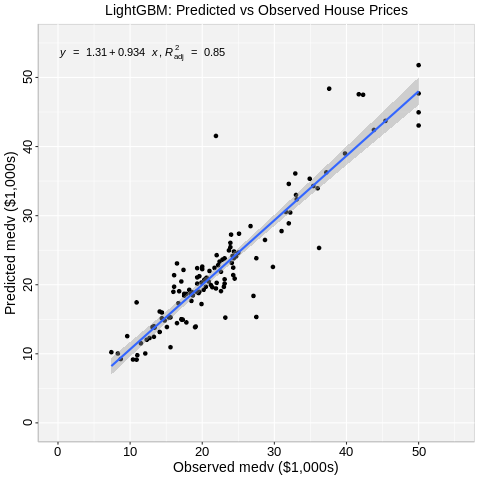

In [16]:
%%R
formula<-y~x

# 1:1 Plot of Predicted vs Observed values
test_df <- data.frame(medv = y_test, medv_pred = test_pred)

ggplot(test_df, aes(x = medv, y = medv_pred)) +
  geom_point() +
  geom_smooth(method = "lm") +
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = y ~ x) +
  ggtitle("LightGBM: Predicted vs Observed House Prices") +
  xlab("Observed medv ($1,000s)") +
  ylab("Predicted medv ($1,000s)") +
  scale_x_continuous(limits = c(0, 55), breaks = seq(0, 55, 10)) +
  scale_y_continuous(limits = c(0, 55), breaks = seq(0, 55, 10)) +
  theme(
    panel.background = element_rect(fill = "grey95", colour = "gray75", size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 13, colour = "black"),
    axis.text.y = element_text(size = 13, angle = 90, vjust = 0.5, hjust = 0.5, colour = "black")
  )

##### Feature Importance

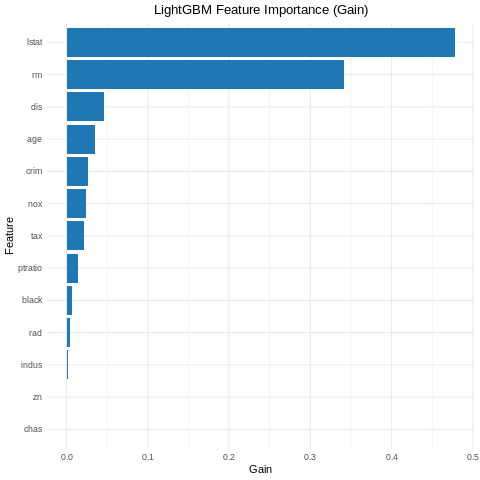

In [17]:
%%R
# Compute and plot variable importance
importance <- lgb.importance(final_model)
feature_names <- colnames(df)[2:ncol(df)]  # All features after medv

# Plot variable importance using ggplot2
p <- ggplot(importance, aes(x = reorder(Feature, Gain), y = Gain)) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  coord_flip() +
  labs(title = "LightGBM Feature Importance (Gain)", x = "Feature", y = "Gain") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the plot
print(p)

### Classification with LightGBM

In this section, we will use the {lightGBM} package to perform classification on a dataset. We will load the dataset, preprocess it, and then fit an lightgbm model for classification. The dataset will be split into training and testing sets, and we will evaluate the model's performance using accuracy and confusion matrix.

#### Data and Data Preparation

We will use`health insurance` dataset to predict the product type (A, B, or C) based on various features such as age, household size, position level, and absence records.

In [ ]:
%%R
# Load the dataset
df <-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")
# Create subset with specified variables
df <- data.frame(
  product = df$product,
  age = df$age,
  household = df$household,
  position_level = df$position_level,
  absent = df$absent,
  gender = factor(df$gender)
)

# Create dummy variable for gender
tmp <- df[, "gender", drop = FALSE]
tmp1 <- dummy_cols(tmp)
tmp1 <- tmp1[, 3:ncol(tmp1)]

# Combine features with dummy variable
d <- data.frame(df[, c("product", "age", "household", "position_level", "absent")], tmp1)
m <- as.matrix(d)

# Encode target variable (product: A=0, B=1, C=2)
d$product <- as.numeric(factor(d$product)) - 1

# Create training and test datasets
set.seed(123)
indices <- sample(1:nrow(df), size = 0.75 * nrow(df))
train <- m[indices, ]
test <- m[-indices, ]

# Load train and test data into LightGBM dataset objects
y_train <- d$product[indices]
y_test <- d$product[-indices]
train_lgb <- lgb.Dataset(
  data = train[, 2:ncol(train)],
  label = y_train,
  params = list(feature_pre_filter = FALSE)
)
test_lgb <- lgb.Dataset(
  data = test[, 2:ncol(test)],
  label = y_test,
  params = list(feature_pre_filter = FALSE)
)

Rows: 1448 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product, gender
dbl (4): age, household, position_level, absent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Fit lightGBM Classification Model

In [ ]:
%%R
# Fit initial model with fixed parameters
initial_params <- list(
  objective = "multiclass",
  metric = "multi_logloss",
  num_class = 3,
  num_leaves = 31,
  learning_rate = 0.05,
  max_depth = 5,
  min_data_in_leaf = 10,
  num_threads = 2L
)

initial_model <- lgb.train(
  params = initial_params,
  data = train_lgb,
  valids = list(test = test_lgb),
  #num_iterations = 1000,
  early_stopping_rounds = 50,
  verbose = -1
)
summary(initial_model)

LightGBM Model (100 trees)
Objective: multiclass (3 classes)
Fitted to dataset with 5 columns


#### Predictions and Evaluation

For model evalution we will use `accuracy` and `multi-class log loss` as metrics. The accuracy is the proportion of correct predictions, while the multi-class log loss measures the performance of a classification model whose output is a probability value between 0 and 1 for each class.

The `multi-class log loss` (also called cross-entropy loss) can be computed manually in R using the formula:

$$ \text{multi_logloss} = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(\hat{p}_{ik}) $$

where:

-   $N$: Number of observations.

-   $K$: Number of classes (3 for `product`: A, B, C).

-   $y_{ik}$: 1 if observation $i$ belongs to class $k$, 0 otherwise.

-   $\hat{p}_{ik}$: Predicted probability for observation $i$ and class $k$.

The LightGBM model outputs predicted probabilities for each class (via `predict(..., reshape = TRUE)`), and the true labels are encoded as 0 (A), 1 (B), and 2 (C). We’ll create a custom `multi_logloss` function to compute this metric and update the script accordingly.

In [ ]:
%%R
# Custom multi-class log loss function
multi_logloss <- function(y_true, y_pred) {
  # Ensure y_true is integer (0, 1, 2 for A, B, C)
  y_true <- as.integer(y_true)
  # Number of observations
  N <- length(y_true)
  # Number of classes
  K <- ncol(y_pred)
  # Initialize log loss
  logloss <- 0
  # Small epsilon to avoid log(0)
  eps <- 1e-15
  # Compute log loss
  for (i in 1:N) {
    # True class index (1-based in R)
    true_class <- y_true[i] + 1
    # Predicted probability for true class, clipped to avoid log(0)
    p <- pmax(pmin(y_pred[i, true_class], 1 - eps), eps)
    logloss <- logloss - log(p)
  }
  # Average log loss
  return(logloss / N)
}

In [ ]:
%%R
# Predictions and evaluation for initial model
yhat_train <- predict(initial_model, train[, 2:ncol(train)])
yhat_test <- predict(initial_model, test[, 2:ncol(test)])
yhat_train_pred <- apply(yhat_train, 1, which.max) - 1
yhat_test_pred <- apply(yhat_test, 1, which.max) - 1

# Calculate accuracy
accuracy_train_initial <- mean(yhat_train_pred == y_train)
accuracy_test_initial <- mean(yhat_test_pred == y_test)
logloss_train_initial <- multi_logloss(y_train, yhat_train)
logloss_test_initial <- multi_logloss(y_test, yhat_test)

# Output results
cat("\nInitial Model Performance:\n")
cat("Training Accuracy:", accuracy_train_initial, "\n")
cat("Test Accuracy:", accuracy_test_initial, "\n")
cat("Training Log Loss:", logloss_train_initial, "\n")
cat("Test Log Loss:", logloss_test_initial, "\n")


Initial Model Performance:
Training Accuracy: 0.8839779 
Test Accuracy: 0.7955801 
Training Log Loss: 0.2651326 
Test Log Loss: 0.4041625 


#### Feature Importance



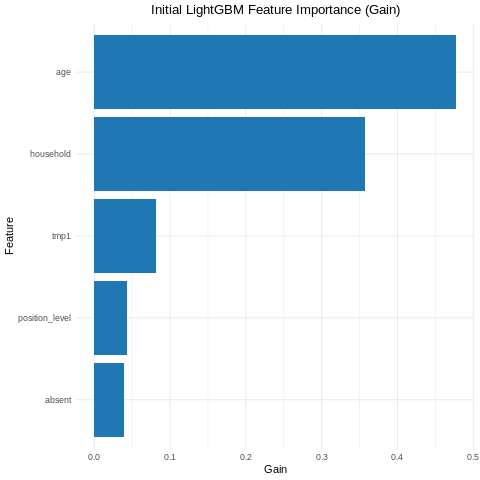

In [ ]:
%%R
# Feature importance for initial model
importance_initial <- lgb.importance(initial_model)
# Plot feature importance for initial model
p_initial <- ggplot(importance_initial, aes(x = reorder(Feature, Gain), y = Gain)) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  coord_flip() +
  labs(title = "Initial LightGBM Feature Importance (Gain)", x = "Feature", y = "Gain") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))
print(p_initial)

#### Hyperparameter Tuning for the Best Parameters

To find the best parameters for the LightGBM classification model, we will perform a grid search over key hyperparameters (`num_leaves`, `learning_rate`, `max_depth`, `min_data_in_leaf`) using 5-fold cross-validation. This will help us optimize the multi-class log loss metric.

##### Define Parameter Grid and Initialize Variables

In [ ]:
%%R
# Define parameter grid for grid search
param_grid <- expand.grid(
  num_leaves = c(20, 31, 50),
  learning_rate = c(0.01, 0.05, 0.1),
  max_depth = c(3, 5, 7),
  min_data_in_leaf = c(10, 20)
)

# Initialize variables to store best parameters and log loss
best_logloss <- Inf
best_params <- NULL
results <- data.frame()

# Perform grid search with 5-fold cross-validation
for (i in 1:nrow(param_grid)) {
  params <- list(
    objective = "multiclass",
    metric = "multi_logloss",
    num_class = 3,
    num_leaves = param_grid$num_leaves[i],
    learning_rate = param_grid$learning_rate[i],
    max_depth = param_grid$max_depth[i],
    min_data_in_leaf = param_grid$min_data_in_leaf[i],
    num_threads = 2L,
    num_iterations = 1000,
    early_stopping_rounds = 50
  )

  # Perform 5-fold cross-validation
  cv_results <- lgb.cv(
    params = params,
    data = train_lgb,
    nfold = 5,
    stratified = TRUE,
    verbose = -1
  )

  # Extract the best log loss from cross-validation
  cv_logloss <- cv_results$best_score

  # Store results
  results <- rbind(results, data.frame(
    num_leaves = params$num_leaves,
    learning_rate = params$learning_rate,
    max_depth = params$max_depth,
    min_data_in_leaf = params$min_data_in_leaf,
    cv_logloss = cv_logloss
  ))

  # Update best parameters if current log loss is better
  if (cv_logloss < best_logloss) {
    best_logloss <- cv_logloss
    best_params <- params
  }

  cat("Grid search iteration", i, "of", nrow(param_grid), "CV Log Loss:", cv_logloss, "\n")
}

Grid search iteration 1 of 54 CV Log Loss: 0.374136 
Grid search iteration 2 of 54 CV Log Loss: 0.3666565 
Grid search iteration 3 of 54 CV Log Loss: 0.3714118 
Grid search iteration 4 of 54 CV Log Loss: 0.3795039 
Grid search iteration 5 of 54 CV Log Loss: 0.3748363 
Grid search iteration 6 of 54 CV Log Loss: 0.371635 
Grid search iteration 7 of 54 CV Log Loss: 0.3723882 
Grid search iteration 8 of 54 CV Log Loss: 0.3798412 
Grid search iteration 9 of 54 CV Log Loss: 0.3688146 
Grid search iteration 10 of 54 CV Log Loss: 0.3974246 
Grid search iteration 11 of 54 CV Log Loss: 0.3890119 
Grid search iteration 12 of 54 CV Log Loss: 0.391992 
Grid search iteration 13 of 54 CV Log Loss: 0.3994136 
Grid search iteration 14 of 54 CV Log Loss: 0.3850187 
Grid search iteration 15 of 54 CV Log Loss: 0.3870488 
Grid search iteration 16 of 54 CV Log Loss: 0.3847712 
Grid search iteration 17 of 54 CV Log Loss: 0.3927315 
Grid search iteration 18 of 54 CV Log Loss: 0.3763153 
Grid search iteration 

##### The Best Parameters

In [ ]:
%%R
cat("\nBest Parameters from Grid Search:\n")
print(best_params)


Best Parameters from Grid Search:
$objective
[1] "multiclass"

$metric
[1] "multi_logloss"

$num_class
[1] 3

$num_leaves
[1] 31

$learning_rate
[1] 0.01

$max_depth
[1] 3

$min_data_in_leaf
[1] 10

$num_threads
[1] 2

$num_iterations
[1] 1000

$early_stopping_rounds
[1] 50



##### Train and Validate Model with Best Parameters

In [ ]:
%%R
# Train final model with best parameters
final_model <- lgb.train(
  params = best_params,
  data = train_lgb,
  valids = list(test = test_lgb),
  verbose = -1
)
summary(final_model)

LightGBM Model (731 trees)
Objective: multiclass (3 classes)
Fitted to dataset with 5 columns


##### Predictions and Evaluation for Final Model

In [ ]:
%%R
# Predictions and evaluation for final model
yhat_train_final <- predict(final_model, train[, 2:ncol(train)])
yhat_test_final <- predict(final_model, test[, 2:ncol(test)])
yhat_train_final_pred <- apply(yhat_train_final, 1, which.max) - 1
yhat_test_final_pred <- apply(yhat_test_final, 1, which.max) - 1

# Calculate accuracy
accuracy_train_final <- mean(yhat_train_final_pred == y_train)
accuracy_test_final <- mean(yhat_test_final_pred == y_test)
logloss_train_final <- multi_logloss(y_train, yhat_train_final)
logloss_test_final <- multi_logloss(y_test, yhat_test_final)

cat("Training Accuracy:", accuracy_train_final, "\n")
cat("Test Accuracy:", accuracy_test_final, "\n")
cat("Training Log Loss:", logloss_train_final, "\n")
cat("Test Log Loss:", logloss_test_final, "\n")

Training Accuracy: 0.8406998 
Test Accuracy: 0.7983425 
Training Log Loss: 0.3167224 
Test Log Loss: 0.3905005 


##### Variable Importance for Final Model

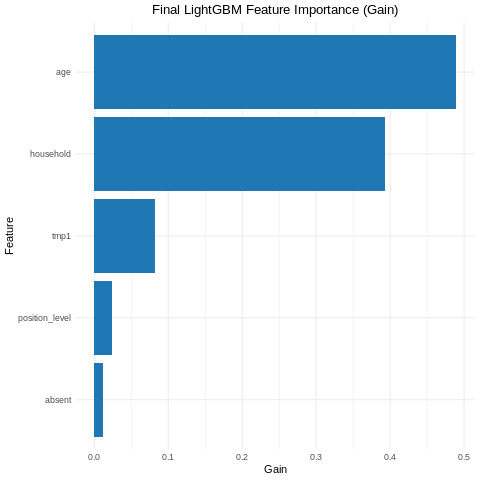

In [ ]:
%%R
# Feature importance for final model
importance_final <- lgb.importance(final_model)
# Plot feature importance for final model
p_final <- ggplot(importance_final, aes(x = reorder(Feature, Gain), y = Gain)) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  coord_flip() +
  labs(title = "Final LightGBM Feature Importance (Gain)", x = "Feature", y = "Gain") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))
print(p_final)

## Summary and Conclusion

LightGBM is a gradient boosting framework optimized for speed, scalability, and efficiency, using techniques like GOSS, EFB, histogram-based learning, and leaf-wise tree growth. It minimizes the same objective function as other boosting algorithms but approximates gradients and feature splits more efficiently. Compared to XGBoost, LightGBM is faster and more memory-efficient, especially for large datasets, but it may require more careful tuning to avoid overfitting due to its leaf-wise approach. Both are powerful, but LightGBM excels in scenarios with large, high-dimensional data, while XGBoost may be preferred for smaller datasets or when robustness is critical. This exercise demonstrated how to implement LightGBM for regression and classification tasks in R, including data preparation, model training, evaluation, and hyperparameter tuning using grid search and cross-validation. The results showed that LightGBM can achieve competitive performance with efficient training and prediction times.

## References

1.  **Kuhn, M., & Johnson, K. (2019). *Feature Engineering and Selection*. CRC Press.**
    -   Covers gradient boosting and LightGBM applications in R.
    -   [Amazon](https://www.amazon.com/Feature-Engineering-Selection-Practical-Predictive/dp/1138079227)
2.  **Hastie, T., et al. (2009). *The Elements of Statistical Learning* (2nd ed.). Springer.**
    -   Explains boosting theory behind LightGBM.
    -   [Free PDF](https://web.stanford.edu/~hastie/ElemStatLearn/)
3.  **Boehmke, B., & Greenwell, B. (2019). *Hands-On Machine Learning with R*. CRC Press.**
    -   Practical LightGBM tutorials in R.
    -   [CRC Press](https://www.crcpress.com/Hands-On-Machine-Learning-with-R/Boehmke-Greenwell/p/book/9781138495685)

### Journal Articles

1.  **Ke, G., et al. (2017). LightGBM: A Highly Efficient Gradient Boosting Decision Tree. *NeurIPS*.**
    -   Introduces LightGBM’s algorithms (GOSS, EFB).
    -   [arXiv](https://arxiv.org/abs/1711.04289)
2.  **Friedman, J. H. (2001). Greedy Function Approximation: A Gradient Boosting Machine. *Annals of Statistics*.**
    -   Foundational gradient boosting theory.
    -   [Stanford](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)
3.  **Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. *KDD*.**
    -   Context for LightGBM’s improvements over XGBoost.
    -   [arXiv](https://arxiv.org/abs/1603.02754)

### Online R Tutorials

1.  **DataCamp: LightGBM in R**
    -   Beginner guide to LightGBM with R code for classification/regression.
    -   [DataCamp](https://www.datacamp.com/community/tutorials/lightgbm-in-r)
2.  **R-bloggers: Gradient Boosting with LightGBM**
    -   Practical tutorial on binary classification and feature importance.
    -   [R-bloggers](https://www.r-bloggers.com/2021/03/gradient-boosting-with-lightgbm-in-r/)
3.  **Towards Data Science: LightGBM for Multi-Class Classification**
    -   Advanced R tutorial with grid search and evaluation.
    -   [Towards Data Science](https://towardsdatascience.com/lightgbm-in-r-2c6b5f96b3f1)

